# Comparing validation results from Projected PPO policy over different alphas -- Low Freq, Fixed Env

In [1]:
from rl_vcf.validate.utils import (
    load_scenario_database,
    add_plotting_data_to_dicts,
    remove_plotting_data_from_dicts,
    plot_mean_std_time_taken,
    plot_failure_probs,
    plot_max_log_alpha,
    get_optimal_max_episode_length,
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conf = 0.9999999

mean_successful_time_taken = {}
std_successful_time_taken = {}
empirical_failure_rate = {}
posterior_bound_failure_rate = {}

task_mean_successful_time_taken = None
task_std_successful_time_taken = None
task_empirical_failure_rate = None
task_posterior_bound_failure_rate = None

No. collected scenarios:  10001
{1.0: (21, 0.22282657031102587), 0.8: (21, 0.21220068691511113), 0.6: (24, 0.19880778230052878), 0.4: (24, 0.18191340279602194), 0.3: (24, 0.16992664977719774), 0.2: (24, 0.15303227027269087), 0.1: (27, 0.12529047016143646), 0.05: (27, 0.09961835236291997), 0.025: (27, 0.07394623456440347)}


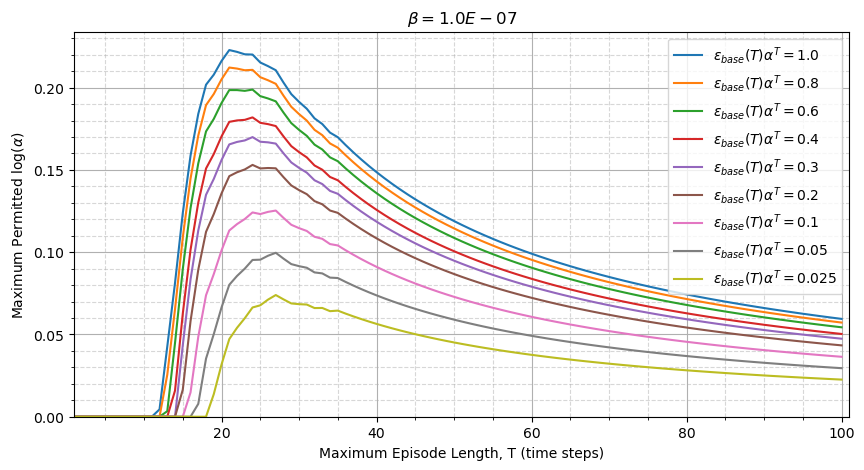

In [3]:
alpha_base_db = load_scenario_database("../../src/rl_vcf/databases/base_policy_db.pkl")
print("No. collected scenarios: ", alpha_base_db.num_collected_scenarios)
bounds = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
fig, ax, peaks = plot_max_log_alpha(
    scenario_db=alpha_base_db, bounds=bounds, conf=conf, cutoff=0.1
)
plt.savefig("get_optimal_episode_length.svg")
print(peaks)

In [4]:
bound = 1.0
T, max_alpha = get_optimal_max_episode_length(alpha_base_db, bound, conf, cutoff=0.1)
epsilon = alpha_base_db.get_selected_epsilons(T, conf)
print("Chosen Bound on Failure Probability: ", bound)
print("Optimal Maximum Episode Length: ", T)
print("Maximum Permitted \u03B1: ", max_alpha)
print("Base Policy Failure Probability Bound at T: ", epsilon)

Chosen Bound on Failure Probability:  1.0
Optimal Maximum Episode Length:  21
Maximum Permitted α:  1.249603836537483
Base Policy Failure Probability Bound at T:  0.00928497314453125


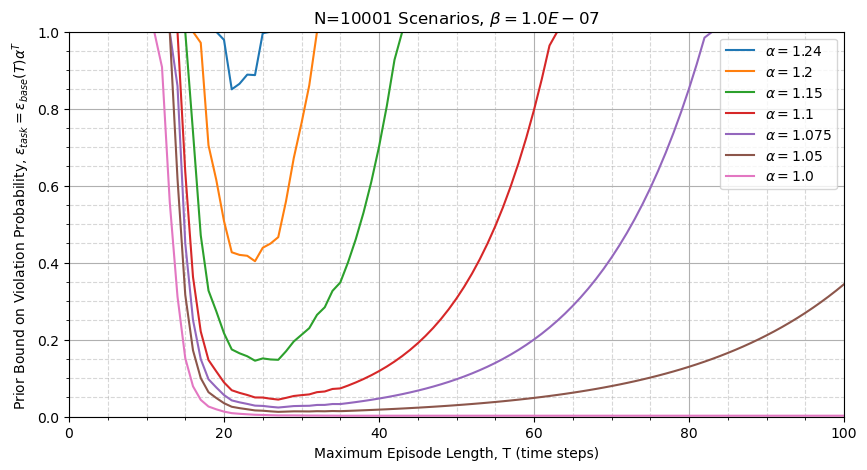

In [5]:
alphas = [1.0, 1.05, 1.075, 1.1, 1.15, 1.2, 1.24]
fig, ax = alpha_base_db.plot_epsilons(
    plot_empirical=False,
    confs=[conf],
    alphas=alphas,
)
plt.savefig("failure_probs_over_episode_length.svg")

In [6]:
alphas = [1.0, 1.05, 1.1, 1.2, 1.35, 1.5, 2.0, 3.0, 5.0, 10.0, 20, 50.0, 100.0]
for alpha in alphas:
    alpha_str = str(float(alpha)).replace(".", "-")
    scenario_db = load_scenario_database(
        "../../src/rl_vcf/databases/scenarios/alpha_{alpha_str}_scenario_db.pkl".format(
            alpha_str=alpha_str
        )
    )
    add_plotting_data_to_dicts(
        scenario_db=scenario_db,
        alpha=alpha,
        T=T,
        mean_successful_time_taken=mean_successful_time_taken,
        std_successful_time_taken=std_successful_time_taken,
        empirical_failure_rate=empirical_failure_rate,
        posterior_bound_failure_rate=posterior_bound_failure_rate,
        conf=conf,
    )

In [7]:
task_mean_successful_time_taken = {}
task_std_successful_time_taken = {}
task_empirical_failure_rate = {}
task_posterior_bound_failure_rate = {}

alphas = [1.0, 1.05, 1.1, 1.2, 1.35, 1.5, 2.0, 3.0, 5.0, 10.0, 20, 50.0, 100.0]
for alpha in alphas:
    alpha_str = str(float(alpha)).replace(".", "-")
    scenario_db = load_scenario_database(
        "../../src/rl_vcf/databases/scenarios/alpha_task_{alpha_str}_scenario_db.pkl".format(
            alpha_str=alpha_str
        )
    )
    add_plotting_data_to_dicts(
        scenario_db=scenario_db,
        alpha=alpha,
        T=T,
        mean_successful_time_taken=task_mean_successful_time_taken,
        std_successful_time_taken=task_std_successful_time_taken,
        empirical_failure_rate=task_empirical_failure_rate,
        posterior_bound_failure_rate=task_posterior_bound_failure_rate,
        conf=conf,
    )

In [8]:
bounds_with_alphas = {}
bounds = [0.1, 1.0]
for bound in bounds:
    alpha = (bound / epsilon) ** (1 / T)
    bounds_with_alphas[bound] = alpha
print(bounds_with_alphas)

{0.1: 1.1198331053474684, 1.0: 1.249603836537483}


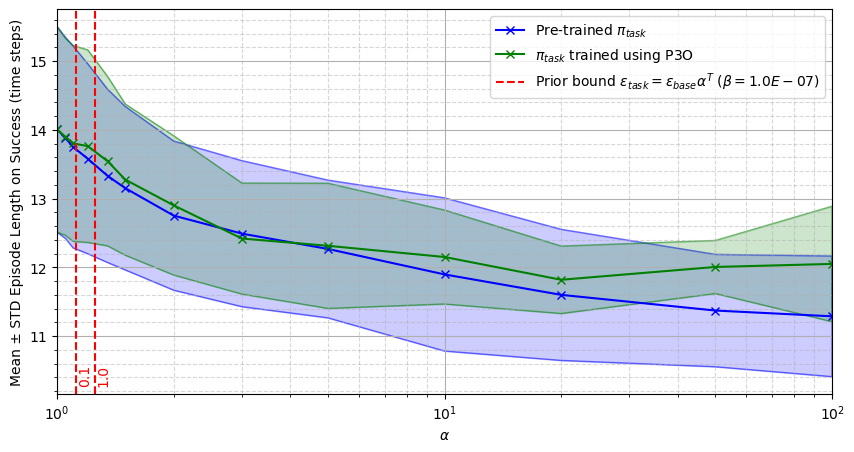

In [9]:
fig, ax = plot_mean_std_time_taken(
    mean_successful_time_taken=mean_successful_time_taken,
    std_successful_time_taken=std_successful_time_taken,
    task_mean_successful_time_taken=task_mean_successful_time_taken,
    task_std_successful_time_taken=task_std_successful_time_taken,
    bounds_with_alphas=bounds_with_alphas,
    conf=conf,
    bound_label_x_offset=0.015,
    bound_label_y_offset=-0.1,
)
plt.savefig("mean_std_time_taken.svg")

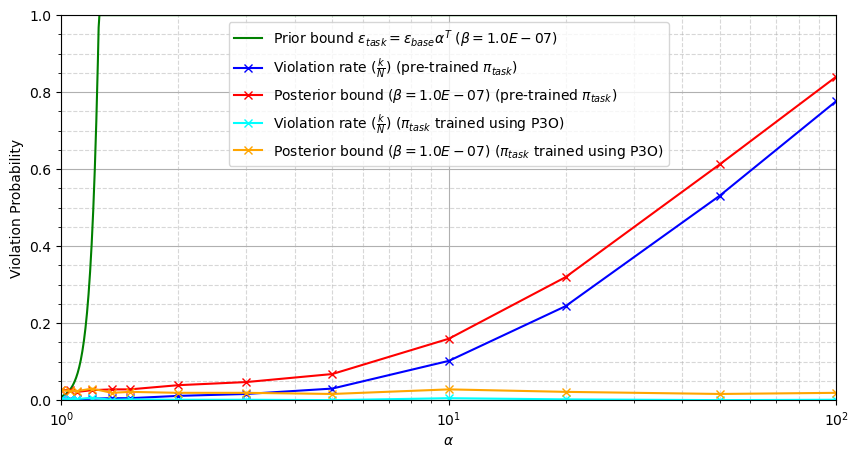

In [10]:
fig, ax = plot_failure_probs(
    epsilon=epsilon,
    empirical_failure_rate=empirical_failure_rate,
    posterior_bound_failure_rate=posterior_bound_failure_rate,
    task_empirical_failure_rate=task_empirical_failure_rate,
    task_posterior_bound_failure_rate=task_posterior_bound_failure_rate,
    T=T,
    conf=conf,
)
plt.savefig("failure_probs.svg")

In [11]:
alphas_to_remove = [1.5, 2.0, 3.0, 5.0, 10.0, 20, 50.0, 100.0]
remove_plotting_data_from_dicts(
    alphas=alphas_to_remove,
    mean_successful_time_taken=mean_successful_time_taken,
    std_successful_time_taken=std_successful_time_taken,
    empirical_failure_rate=empirical_failure_rate,
    posterior_bound_failure_rate=posterior_bound_failure_rate,
)

remove_plotting_data_from_dicts(
    alphas=alphas_to_remove,
    mean_successful_time_taken=task_mean_successful_time_taken,
    std_successful_time_taken=task_std_successful_time_taken,
    empirical_failure_rate=task_empirical_failure_rate,
    posterior_bound_failure_rate=task_posterior_bound_failure_rate,
)

In [12]:
bounds_with_alphas_closeup = {}
bounds_closeup = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
for bound in bounds_closeup:
    alpha = (bound / epsilon) ** (1 / T)
    bounds_with_alphas_closeup[bound] = alpha
print(bounds_with_alphas_closeup)

{0.025: 1.048295638502682, 0.05: 1.0834741160667687, 0.1: 1.1198331053474684, 0.2: 1.1574122217008047, 0.3: 1.1799765106018127, 0.4: 1.1962524098863223, 0.6: 1.2195739062979782, 0.8: 1.2363959886789215, 1.0: 1.249603836537483}


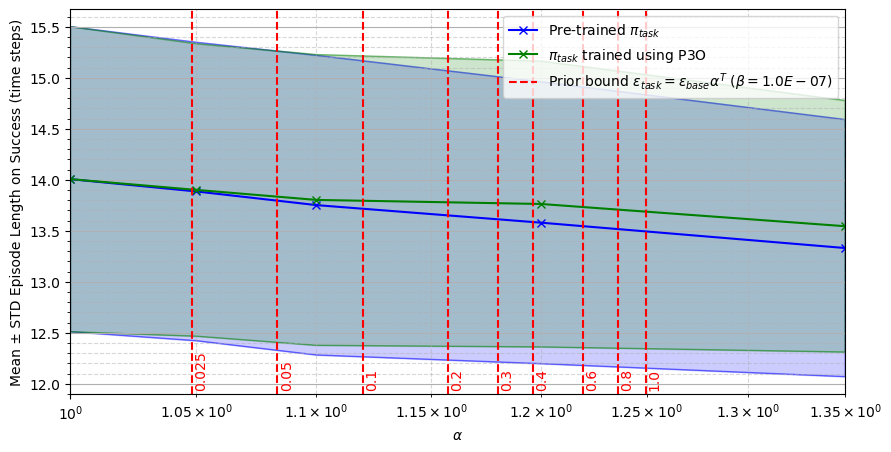

In [13]:
fig, ax = plot_mean_std_time_taken(
    mean_successful_time_taken=mean_successful_time_taken,
    std_successful_time_taken=std_successful_time_taken,
    task_mean_successful_time_taken=task_mean_successful_time_taken,
    task_std_successful_time_taken=task_std_successful_time_taken,
    bounds_with_alphas=bounds_with_alphas_closeup,
    conf=conf,
    bound_label_x_offset=0.001,
    bound_label_y_offset=-0.1,
)
plt.legend(loc="upper right")
plt.savefig("mean_std_time_taken_closeup.svg")

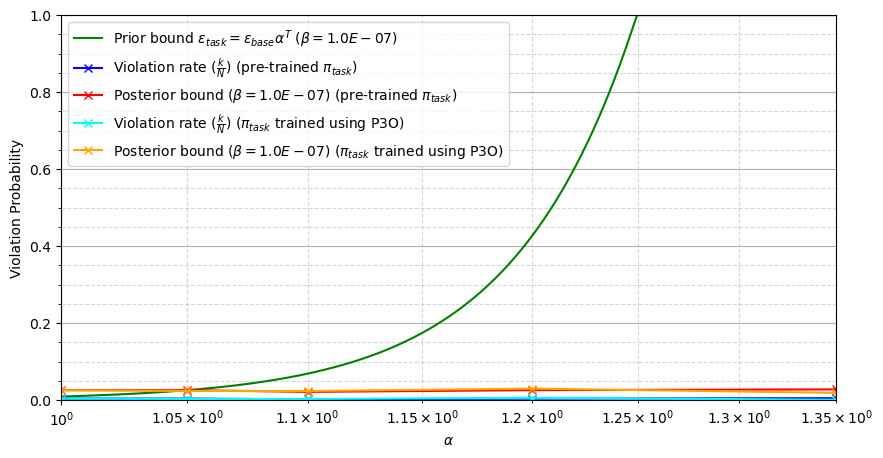

In [14]:
fig, ax = plot_failure_probs(
    epsilon=epsilon,
    empirical_failure_rate=empirical_failure_rate,
    posterior_bound_failure_rate=posterior_bound_failure_rate,
    task_empirical_failure_rate=task_empirical_failure_rate,
    task_posterior_bound_failure_rate=task_posterior_bound_failure_rate,
    T=T,
    conf=conf,
)
plt.savefig("failure_probs_closeup.svg")